**Line Graph**

In [1]:
# a graph that displays a variable over time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tech = pd.read_csv('tech.csv',parse_dates=[0])
tech.set_index('date',inplace = True)

**Create a line graph for a Series**

In [4]:
#  plot a line graph for apple price
#  create an Apple price series
AAPL = tech.loc[tech['name']=='AAPL','close']
AAPL

date
2014-01-02     79.02
2014-01-03     77.28
2014-01-06     77.70
2014-01-07     77.15
2014-01-08     77.64
               ...  
2019-08-19    210.35
2019-08-20    210.36
2019-08-21    212.64
2019-08-22    212.46
2019-08-23    202.64
Name: close, Length: 1421, dtype: float64

**常见的Series.plot的argument**  
1. kind : can be 'area', 'bar', 'barh', 'hist', 'line', 'pie'
2. xlim, ylim
3. ax: matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
4. xlabel,ylabel

**对于Series，x轴默认为index，y轴默认为数据本身**

<AxesSubplot:title={'center':'Apple share price'}, xlabel='date'>

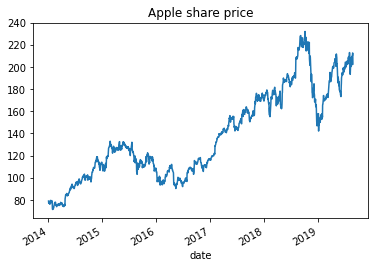

In [5]:

#此处需要注意的是，我们使用的语句其实是pandas根据matplotlib为基础优化的针对series的语法
fig1,ax1 = plt.subplots()
AAPL.plot(ax = ax1, kind = 'line',title = 'Apple share price',legend = False)
#以下语句是matplotlib的写法，实现的效果是一样的
# ax1.plot(AAPL)
# ax1.set_title('Apple share price')


In [6]:
# What if we want to compare MSFT,AAPL and FB share price during the same period?
tech.head()

,month,year,day,name,open,close,high,low,volume,volume_type
date,,,,,,,,,,
2014-01-02,1,2014,2,FB,54.86,54.71,55.22,54.19,43257622,medium
2014-01-02,1,2014,2,AAPL,79.38,79.02,79.58,78.86,8398851,low
2014-01-02,1,2014,2,GOOGL,557.73,556.56,558.88,554.13,1822719,medium
2014-01-02,1,2014,2,MSFT,37.35,37.16,37.40,37.10,30643745,medium
2014-01-02,1,2014,2,AMZN,398.80,397.97,399.36,394.02,2140246,medium


**对于dataframe来说，我们一样可以用plot method。对于dataframe来说，x轴默认为index，y轴可以自定义，如果不输入任何参数，则所有numerical value 都会被plot。另外务必在plot之前，确保想要plot的数据是单独一列的，否则会出现错误。**

In [7]:
#由于line graph plot的主要参数是x轴和y轴的数据，我们需要先将FB.AAPL,MSFT的股价转换成单独一列
#思路可以是先将AAPL,MSFT和FB的股价都转换为一个series，再利用pd.concat进行横向拼接
FB = tech.loc[tech['name'] == 'FB','close'].rename('FB')
MSFT = tech.loc[tech['name'] == 'MSFT','close'].rename('MSFT')
AAPL = tech.loc[tech['name']=='AAPL','close'].rename('AAPL')

new_tech = pd.concat([MSFT, FB, AAPL],axis=1)
new_tech.head(10)
# df.pivot 是一个非常好用的将行转列的method
#tech.pivot(columns = 'name',values = 'close')[['AAPL','MSFT','FB']]

,MSFT,FB,AAPL
date,,,
2014-01-02,37.16,54.71,79.02
2014-01-03,36.91,54.56,77.28
2014-01-06,36.13,57.20,77.70
2014-01-07,36.41,57.92,77.15
2014-01-08,35.76,58.23,77.64
2014-01-09,35.53,57.22,76.65
2014-01-10,36.04,57.94,76.13
2014-01-13,34.98,55.91,76.53
2014-01-14,35.78,57.74,78.06


**对于dataframe来说，我们一样可以用plot method。对于dataframe来说，x轴默认为index，y轴可以自定义，如果不输入任何参数，则所有numerical value 都会被plot。另外务必在plot之前，确保想要plot的数据是单独一列的，否则会出现错误。**

<AxesSubplot:xlabel='date'>

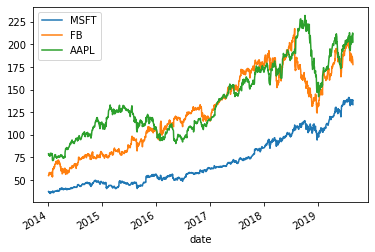

In [8]:
fig2,ax2 = plt.subplots()
new_tech.plot(ax = ax2) #当我们没有给plot method任何参数下，默认为index为横坐标，所有numerical value都会被画出来

<AxesSubplot:xlabel='date'>

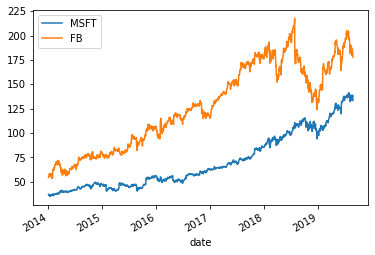

In [9]:
#如果我们只想比较MSFT和FB的股价呢？主动给plot method参数，告诉它我们只想比MSFT和FB
new_tech.plot(y=['MSFT','FB'], kind = 'line') #kind可在此处省略，Pandas会在没有指明类型的情况下默认为line

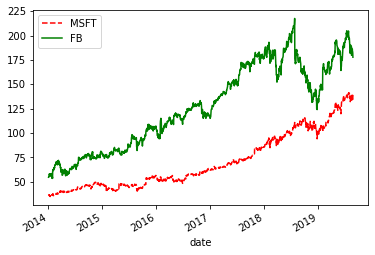

In [10]:
#同样，之前教给大家的关于对于折线图颜色和style的设置同样可以在这里使用(借用dictionary),唯一区别为style不是linestyle
new_tech.plot(y=['MSFT','FB'], color = {'MSFT':'red','FB':'green'}, style={'MSFT':'--','FB':'-'});

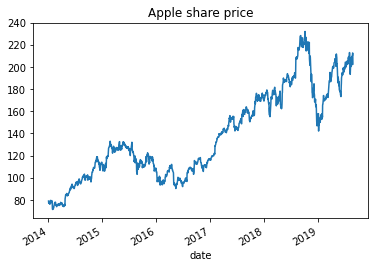

In [11]:
fig1

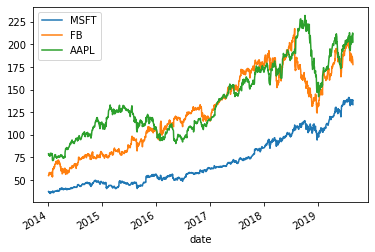

In [12]:
fig2 
#fig1 与fig2 都没有受到影响，因为我们在只画MSFT和FB的股价时，并没有指定任何一个figure或者axes，pandas帮我们自动另外创建了个figure

**Bar Charts**

In [13]:
# a chart that displays a numerical value across levels of a categorical value

In [14]:
fortune1000 = pd.read_csv('fortune1000.csv')

In [15]:
fortune1000.head(10)

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400
5,6,UnitedHealth Group,Health Care,Health Care: Insurance and Managed Care,"Minnetonka, MN",157107,5813,200000
6,7,CVS Health,Food and Drug Stores,Food and Drug Stores,"Woonsocket, RI",153290,5237,199000
7,8,General Motors,Motor Vehicles & Parts,Motor Vehicles and Parts,"Detroit, MI",152356,9687,215000
8,9,Ford Motor,Motor Vehicles & Parts,Motor Vehicles and Parts,"Dearborn, MI",149558,7373,199000
9,10,AT&T,Telecommunications,Telecommunications,"Dallas, TX",146801,13345,281450


In [16]:
# What is the distribution of the fortune 1000 as per the sector?
fortune1000_sector = fortune1000['Sector'].value_counts()
fortune1000_sector

Financials                      139
Energy                          122
Technology                      102
Retailing                        80
Health Care                      75
Business Services                51
Industrials                      46
Materials                        43
Food, Beverages & Tobacco        43
Wholesalers                      40
Transportation                   36
Chemicals                        30
Household Products               28
Engineering & Construction       26
Media                            25
Hotels, Resturants & Leisure     25
Motor Vehicles & Parts           24
Aerospace & Defense              20
Telecommunications               15
Apparel                          15
Food and Drug Stores             15
Name: Sector, dtype: int64

<AxesSubplot:>

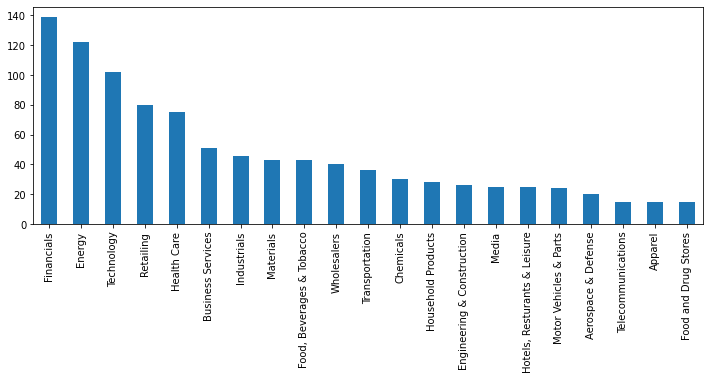

In [17]:
#我们依然使用的是plot method，但是kind中需要主动传入参数bar，figsize是调整整块画布的尺寸,可以在具体作画时调整，也可以在创建画布时设置

fig3,ax3 = plt.subplots(figsize = (12,4))
fortune1000_sector.plot(kind = 'bar',ax = ax3)

#以下方法画出的结果一样
#fig3,ax3 = plt.subplots()
#fortune1000_sector.plot(kind = 'bar',figsize = (12,4),ax = ax3)

In [18]:
#horizontal bar chart

<AxesSubplot:>

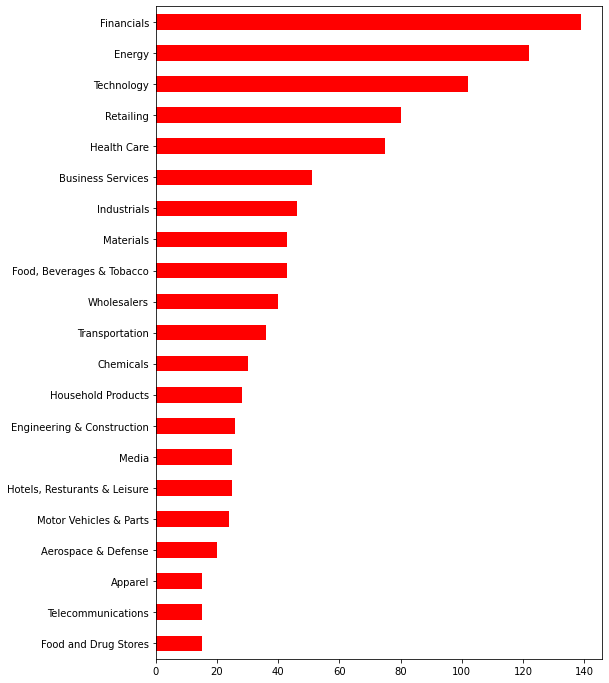

In [19]:
fig4,ax4 = plt.subplots()
fortune1000_sector.sort_values(ascending = True).plot(kind='barh',figsize=(8,12),color = 'red')

In [22]:
# This data picks up the fortune 1000 only by revenue. However, some companies have huge revenue 
# while very low net income even loss. Let's examine it and learn how to draw two-deminsional bar chart
# create a new column called profit margin
fortune1000['Profit margin'] = fortune1000['Profits']/fortune1000['Revenue']

In [23]:
# define a function to map the profit margin
def profit_level_assign(x):
    if x<0:
        return 'Loss'
    elif 0 < x< 0.1:
        return 'Normal'
    else:
        return 'High'

In [24]:
fortune1000['Profit level'] = fortune1000['Profit margin'].apply(lambda x:profit_level_assign(x))

In [25]:
fortune1000.head()

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees,Profit margin,Profit level
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000,0.030477,Normal
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600,0.065596,Normal
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000,0.228458,High
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000,0.114234,High
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400,0.008144,Normal


**What is lambda? How does this function work?**  
1. lambda function is a small anonymous function in Python（匿名函数）
2. A lambda function can take any number of arguments, but can only have one expression.（可以包含任意个arg，但是只能一个expression），expression为一个function,arguments的具体命名可以自定义，只是一个placeholder的名字。  
    **lambda arguments : expression**
3. lambda在dataframe的操作中经常被使用，应用场景为在function内再使用自定义的function，它可以帮我们完成对于df中的元素的操作。



In [60]:
x = lambda a : a + 10
print(x(5))

15


In [64]:
y = lambda a,b : a*b
print(y(5,10))

#(lambda a,b : a*b)(5,10)

50


In [68]:
l=[('b',2),('f',4),('c',10),('a',15)]
l.sort(key = lambda x:x[0])
l

[('a', 15), ('b', 2), ('c', 10), ('f', 4)]

**lambda function in Pandas**

In [44]:
#Create a Dataframe
s = pd.DataFrame(index=['A','B','C','D'],data = {'Number':[1,2,3,4]})
s

,Number
A,1
B,2
C,3
D,4


In [42]:
# use the lambda function to create another column called 'Number squared', which equals the number in first column squared
s['Number squared']=s.apply(lambda x:x**2)
s
#此处的运算逻辑为有一个函数，会让传入的数字平方。传入的数字从这个叫作s的dataframe中来，由于此时整个dataframe只有一列，所以pandas默认以
#列的方向（垂直）将每一个值分别传入x平方的函数中进行计算，再将运算得到的这一列数返回，作为叫作‘Number Squared’的一列


,Number,Number squared
A,1,1
B,2,4
C,3,9
D,4,16


In [31]:
# Create another more complex dataframe
d = {'Name':['John','Alex','Kevin','Tony'],'Score':[85,91,75,68],'No of Attempts':[2,1,3,4]}
df=pd.DataFrame(d)
df

,Name,Score,No of Attempts
0,John,85,2
1,Alex,91,1
2,Kevin,75,3
3,Tony,68,4


**Question**  
**We want to give each person a grade. The criteria is if score is larger than 90 and the number of attempts is less than 2
the grade is excellent. If score is larger than 80 but less than 90, and the number of attempts is less than 3, the grade
is good. Others are need improvement.**  

此处我们想要解决的问题需要2列同时处理，只有当2列同时满足我们所定义的条件时，才能给予一个对应的grade。



In [29]:
#define the function to solve the problem
def grade(score,number):
    if score >= 90 and number < 2:
        return 'Excellent'
    elif score >= 80 and score < 90 and number < 3:
        return 'Good'
    else:
        return 'Need Improvement'

In [30]:
df['Grade'] = df.apply(lambda row:grade(row['Score'],row['No of Attempts']),axis=1)
df
#此处由于我们需要将2列数据同时进行考虑，最好的办法是将每一行的数据分别传入我们所定义的函数中。argument的命名（row) 以及 axis= 1
#已经提示传入函数中的input是一行。Pandas会将这每一行当作是一个series，series的index分别是name，socre和 no of attempts。
#我们指定Score作为自定义函数中的score传入，No of Attempts作为number传入到自定义函数中进行计算。
#务必注意，axis = 1 不可以漏！！！因为apply method的默认是axis = 0，即将一列整体传入函数中运算。

,Name,Score,No of Attempts,Grade
0,John,85,2,Good
1,Alex,91,1,Excellent
2,Kevin,75,3,Need Improvement
3,Tony,68,4,Need Improvement


In [185]:
profit_level = fortune1000.pivot_table(values= 'Company', index = 'Sector', columns= 'Profit level', aggfunc='count')

In [186]:
profit_level

Profit level,High,Loss,Normal
Sector,,,
Aerospace & Defense,6.0,2.0,12.0
Apparel,1.0,NaN,14.0
Business Services,20.0,4.0,27.0
Chemicals,10.0,6.0,14.0
Energy,24.0,43.0,55.0
Engineering & Construction,NaN,3.0,23.0
Financials,66.0,9.0,64.0
Food and Drug Stores,NaN,2.0,13.0
"Food, Beverages & Tobacco",12.0,5.0,26.0


<AxesSubplot:xlabel='Sector'>

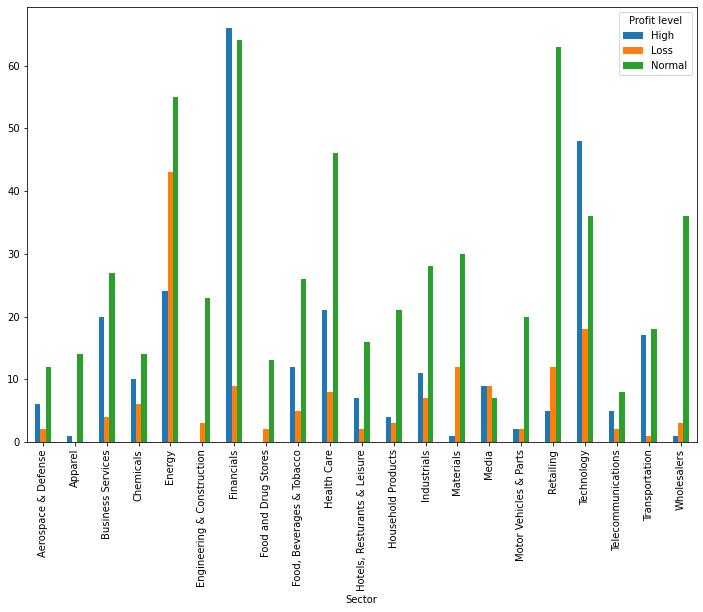

In [187]:
#这里我们可以直接告诉pandas我们想要什么样的plot type，因为pivot_table下index已经是各个sector，所有的numerical value都被画出来
profit_level.plot(kind = 'bar', figsize = (12,8))

In [188]:
#Stacked bar chart

<AxesSubplot:title={'center':'fortune 1000 profit level breakdown'}, xlabel='Sector', ylabel='# of companies'>

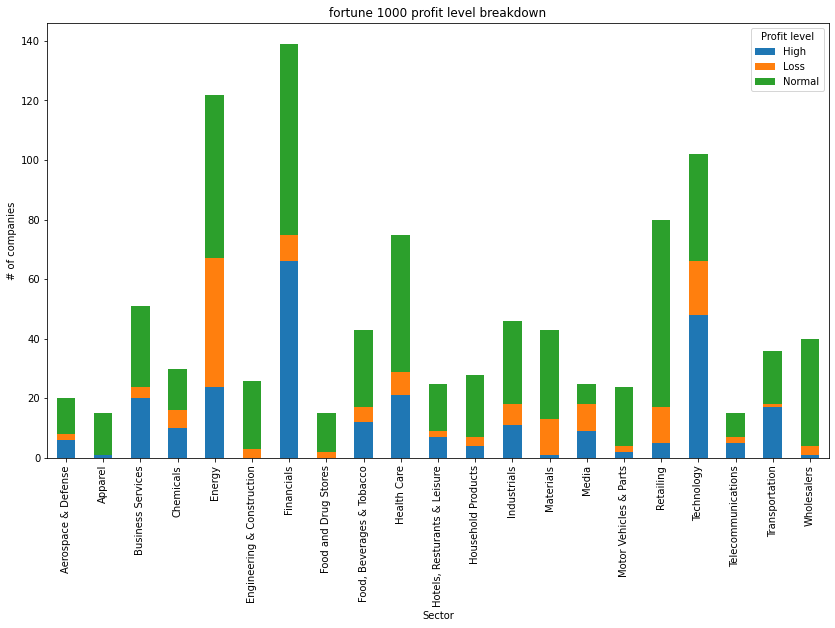

In [191]:
profit_level.plot(kind = 'bar', figsize = (14,8), stacked= True, 
                  ylabel ='# of companies',title = 'fortune 1000 profit level breakdown')

**Summary**  
df.plot(kind = 'bar')中默认x轴是index，横轴是所有numerical value的column。如果我们想要在同一个bar chart中展现2个维度的数据量（比如在
我们的例子中的行业和利润率），我们需要将它们放在不同的columns中，stacked = true可以控制是不是stacked bar chart

**Pie Chart**

In [69]:
## a plot that is used to show how a total amount is attributed between its component parts

In [70]:
tech = fortune1000[fortune1000.Sector == 'Technology']

In [78]:
# what is the share of each sub-sector under technology?
sub_tech = tech.Industry.value_counts()
sub_tech

Semiconductors and Other Electronic Components    23
Internet Services and Retailing                   15
Computer Software                                 14
Network and Other Communications Equipment        14
Information Technology Services                   13
Scientific,Photographic and Control Equipment     12
Computers, Office Equipment                        7
Computer Peripherals                               4
Name: Industry, dtype: int64

<AxesSubplot:ylabel='Industry'>

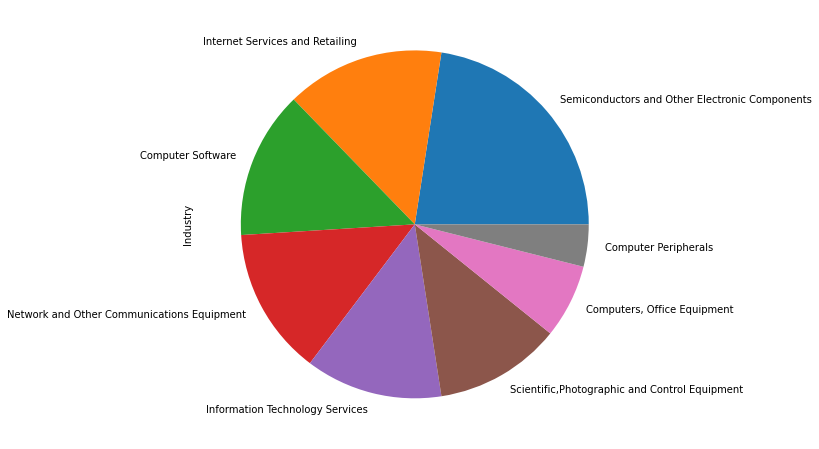

In [92]:
sub_tech.plot(kind = 'pie',figsize=(8,8))
# Usually, when we present the pie chart to see the breakdown. it is nice to show the percentage for each component and 
# emphaize the largest part

<AxesSubplot:ylabel='Industry'>

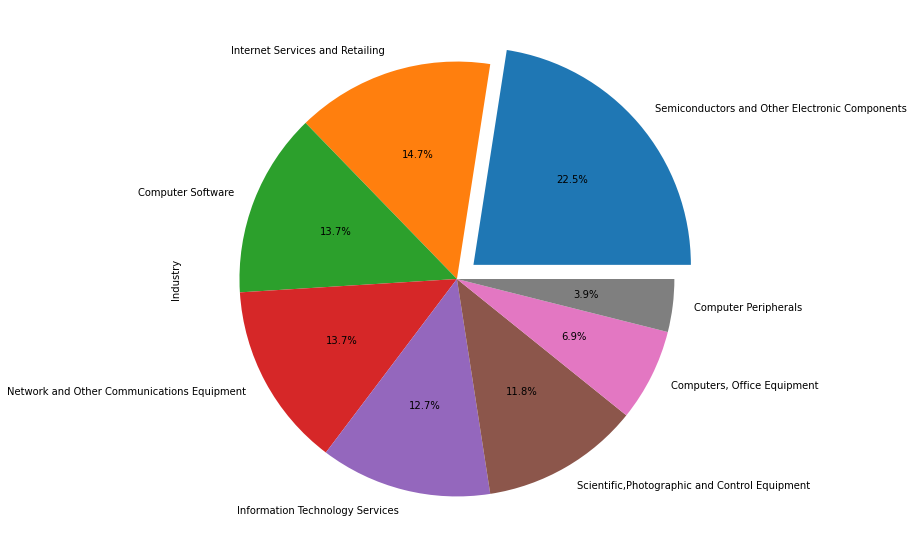

In [82]:
# Use autopct to ask Python to automatically calcuate the share percentage.
# Use explode to control which pie piece you want to highlight. Pie chart will show each piece counterclock wise
# The list you pass to explode must have the same length as the index of the series or dataframes
sub_tech.plot(kind = 'pie',figsize=(10,10),autopct = '%.1f%%', explode = [0.1,0,0,0,0,0,0,0])

**Format number**  
一种给数字“化妆”的语法

In [192]:
print('{:.0f}'.format(8.9)) #在{}中以：开始，小数点后代表保留几位小数，f代表整体数字是float number，format括号中的数字是要化妆的

9


In [193]:
print('{:.2f}'.format(5.39120))

5.39


In [200]:
print('{:.2f}%'.format(10.12345))

10.12%


In [201]:
#What if we want to format number with commas as thousand separator?

<AxesSubplot:ylabel='Industry'>

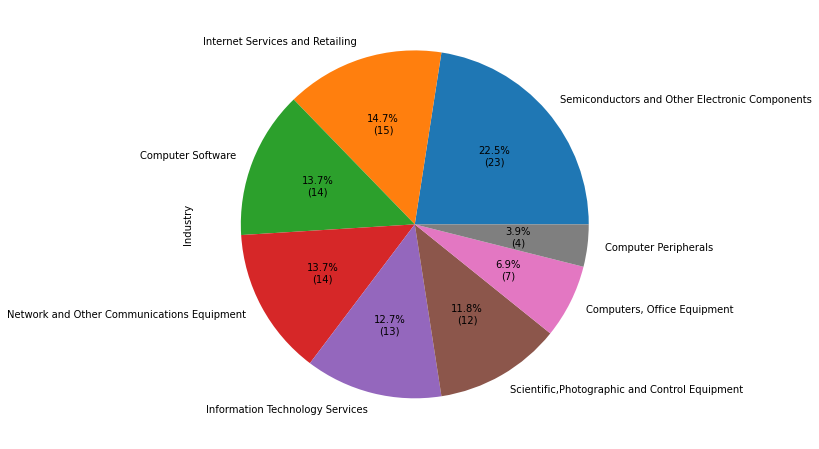

In [202]:
# What if we want both percentage and actual number labelled in the pie chart?
def profit(pct, series):
    absolute = pct/100.*series.sum()
    return "{:.1f}%\n({:.0f})".format(pct, absolute)

sub_tech.plot(kind = 'pie',legend = False,figsize=(8,8),
              autopct= lambda x: profit(x,sub_tech))

**Scatter Plot**

In [94]:
# show the relationship between two numeric values

<AxesSubplot:xlabel='Revenue', ylabel='Profits'>

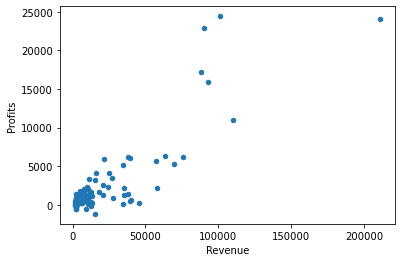

In [103]:
#What is the relationship between revenue and profits for financial sector?
#Please note that, for scatter plot, you MUST specify x and y
fortune1000.loc[fortune1000['Sector'] == 'Financials',['Revenue','Profits']].plot(kind = 'scatter',x='Revenue',y='Profits')

In [104]:
# Series.corr()
fortune1000.loc[fortune1000['Sector'] == 'Financials','Revenue'].corr(fortune1000.loc[fortune1000['Sector'] == 'Financials','Profits'])

0.866093373271978

In [105]:
#What about the correlation between revenue and profit for industrial sector?
fortune1000.loc[fortune1000['Sector'] == 'Industrials','Revenue'].corr(fortune1000.loc[fortune1000['Sector'] == 'Industrials','Profits'])

-0.2900468213322915

<AxesSubplot:xlabel='Revenue', ylabel='Profits'>

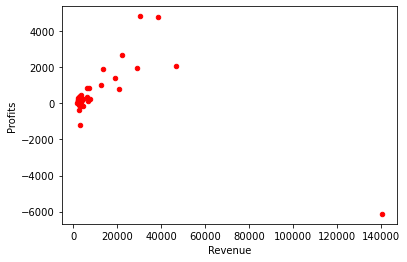

In [106]:
fortune1000[fortune1000['Sector'] == 'Industrials'].plot(kind = 'scatter',x='Revenue',y='Profits',color = 'red')
# We can clearly see that one outier in the bottom right corner is the reason why industrial has negatve correlation

**A comprehensive project**

In [203]:
world = pd.read_csv('worldstats_v1.csv')

In [207]:
world.sample(10)

,country,year,Population,GDP,Continent
4756,Luxembourg,1972,346600,1.988356e+09,Europe
2969,Germany,2007,82266372,3.440000e+12,Europe
6329,Peru,2000,25914875,5.098086e+10,Americas
4287,"Korea, Rep.",2013,50219669,1.310000e+12,Asia
1456,Cameroon,1964,5850454,7.823844e+08,Africa
8606,Virgin Islands (U.S.),1975,94000,3.998000e+08,Americas
7152,Solomon Islands,1981,238488,1.873133e+08,Oceania
869,Bermuda,1996,60129,2.695390e+09,Americas
3013,Ghana,2009,23713164,2.597785e+10,Africa
1925,Costa Rica,1990,3095994,7.403457e+09,Americas


In [208]:
#Note that the GDP column is showning in scientific format, let's do some manipulation to make it show in billion
world['GDP'] = world['GDP'].apply(lambda x: x/1000000000)
world.rename(columns={'GDP':'GDP($B)'},inplace = True)

In [209]:
#1 What are countries with top 5 GDP in 2015? 

In [211]:
# extract the data only for 2015
world_2015 = world.loc[world['year'] == 2015]
# sort the dataframe by GDP and show only the top 5
top5 = world_2015.sort_values(by='GDP($B)',ascending = False)[:5]
top5

,country,year,Population,GDP($B),Continent
8329,United States,2015,321418820,17900.0,Americas
1641,China,2015,1371220000,10900.0,Asia
4050,Japan,2015,126958472,4120.0,Asia
2961,Germany,2015,81413145,3360.0,Europe
8273,United Kingdom,2015,65138232,2850.0,Europe


In [238]:
# Can you show the GDP allocation between top 5 countries and the rest of the world?

# Get what is the total GDP for non top 5 conutries and append it to the dataframe
rest_of_world_gdp = world_2015.loc[~world_2015['country'].isin(['United States', 'China', 'Japan', 'Germany', 'United Kingdom']),
                                  'GDP($B)'].sum()

In [239]:
rest_of_world = pd.DataFrame({'country':'rest of world','year':2015, 
                              'GDP($B)':rest_of_world_gdp},index=[0])

In [240]:
gdp_2015 = pd.concat([top5,rest_of_world],axis=0).set_index('country')
gdp_2015

,year,Population,GDP($B),Continent
country,,,,
United States,2015,3.214188e+08,17900.000000,Americas
China,2015,1.371220e+09,10900.000000,Asia
Japan,2015,1.269585e+08,4120.000000,Asia
Germany,2015,8.141314e+07,3360.000000,Europe
United Kingdom,2015,6.513823e+07,2850.000000,Europe
rest of world,2015,NaN,31774.514318,NaN


<AxesSubplot:title={'center':'2015 GDP Contribution'}>

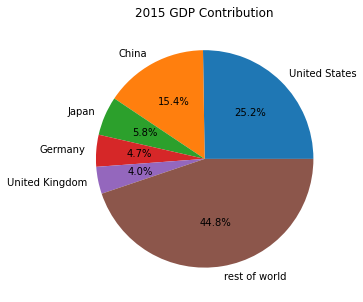

In [241]:
gdp_2015.plot(kind='pie',y ='GDP($B)',autopct='%.1f%%',figsize=(5,5),ylabel = '',
              legend = False,title='2015 GDP Contribution')
#由于此时是dataframe，我们需要主动传入y轴，否则pandas无法明确判断哪一列数据我们需要plot

In [253]:
#2 Show the GDP trend from 1960 to 2015 for China,Japan,US?

In [255]:
world_top3 = world[world['country'].isin(['China','Japan','United States'])]
world_top3

,country,year,Population,GDP($B),Continent,GDP per person
1641,China,2015,1371220000,10900.0,Asia,7949.125596
1642,China,2014,1364270000,10400.0,Asia,7623.124455
1643,China,2013,1357380000,9490.0,Asia,6991.409922
1644,China,2012,1350695000,8460.0,Asia,6263.442154
1645,China,2011,1344130000,7490.0,Asia,5572.377672
...,...,...,...,...,...,...
8380,United States,1964,191889000,686.0,Americas,3574.983454
8381,United States,1963,189242000,639.0,Americas,3376.628867
8382,United States,1962,186538000,605.0,Americas,3243.306994
8383,United States,1961,183691000,563.0,Americas,3064.929692


In [257]:
# use pivot method to make the each country as a column for plot  
world_top3.pivot(index='year',columns='country',values='GDP($B)')
world_top3.head()

,country,year,Population,GDP($B),Continent,GDP per person
1641,China,2015,1371220000,10900.0,Asia,7949.125596
1642,China,2014,1364270000,10400.0,Asia,7623.124455
1643,China,2013,1357380000,9490.0,Asia,6991.409922
1644,China,2012,1350695000,8460.0,Asia,6263.442154
1645,China,2011,1344130000,7490.0,Asia,5572.377672


<AxesSubplot:xlabel='year'>

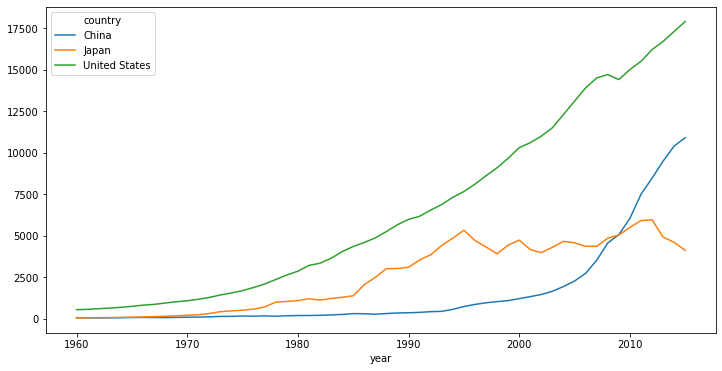

In [266]:
fig6,ax6 = plt.subplots()
world_top3.pivot(index='year',columns='country',values='GDP($B)').plot(ax = ax6,kind='line',figsize=(12,6))

In [259]:
# It is nice if we can add some text or commentary in a certain part of the line to show some significant event
# Now we will learn axes.annotate method

**Axes.annotate(str,xy,xytext,arrowprops)**  
str: what you want to add in the chart  
xy: The point (x, y) to annotate (箭头指向的位置）  
xytext: The position (x, y) to place the text at.(实际添加标注的位置）  
arrowprops: optional如果不写，则没有箭头，只有文字。常用参数是2个,以dict形式赋值  
> facecolor：the color of your arrow  
> shrink: usually <1, let the arrow not too close to the text and line

In [267]:
ax6.annotate('Lost 20 years', xy=(1995, 5500), xytext=(1998, 6000),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax6.annotate('Financial Crisis', xy=(2008, 15000), xytext=(2004, 17000),
            arrowprops=dict(facecolor='black',shrink=0.05))

ax6.annotate('China joined WTO', xy=(2001, 1000), xytext=(2005, 800),
            arrowprops=dict(facecolor='black', shrink=0.05))

Text(2005, 800, 'China joined WTO')

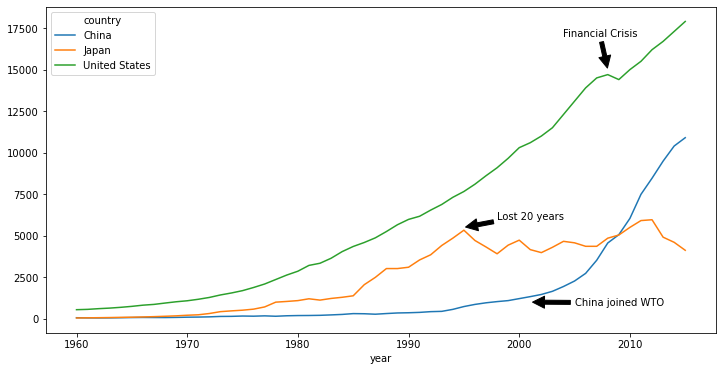

In [268]:
fig6

**Axes.text(x,y,text,fontsize)**  
在特定位置标注文字  
x,y:在什么坐标开始写字  
text：写什么  
fontsize：optional（字体大小是多少） 


In [274]:
AAPL_sub = AAPL[-5:]

In [275]:
AAPL_sub

date
2019-08-19    210.35
2019-08-20    210.36
2019-08-21    212.64
2019-08-22    212.46
2019-08-23    202.64
Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

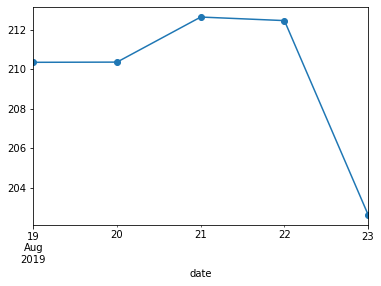

In [316]:
fig7,ax7 = plt.subplots()
AAPL_sub.plot(kind = 'line',ax = ax7, marker='o')

In [317]:
for i in range(len(AAPL_sub)):  
    ax7.text(AAPL_sub.index[i],AAPL_sub.values[i]-0.5,AAPL_sub.values[i])

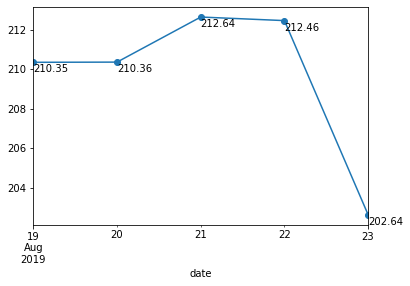

In [318]:
fig7

In [242]:
#3 According to world bank,from 2010,GDP per person larger than 12000 USD is considered as high income,
# can you use bar chart to show how many high income countries are from each continent in past 5 years (2010-2015)?

In [243]:
# Add a new column called GDP per person and filter only for the number larger than 12000
world['GDP per person'] = world['GDP($B)']/world['Population']*1000000000 #Remeber we divide 1B to the GDP

In [244]:
#Keep extracting the data and take the data from 2010-2015 and GDP per person higher than 12000 USD
mask = (world['year'].isin(range(2010,2016)) & (world['GDP per person']>=12000))
high_income = world.loc[mask]

In [245]:
high_income

,country,year,Population,GDP($B),Continent,GDP per person
125,Andorra,2013,75902,3.249101,Europe,42806.522450
126,Andorra,2012,79316,3.146178,Europe,39666.369219
127,Andorra,2011,82326,3.427236,Europe,41630.052584
128,Andorra,2010,84419,3.346317,Europe,39639.386027
200,Antigua and Barbuda,2015,91818,1.297285,Americas,14128.878542
...,...,...,...,...,...,...
8388,Uruguay,2012,3396753,51.265400,Americas,15092.472059
8389,Uruguay,2011,3385610,47.962439,Americas,14166.557667
8503,"Venezuela, RB",2013,30276045,371.000000,Americas,12253.912293
8504,"Venezuela, RB",2012,29854238,381.000000,Americas,12762.007190


In [247]:
# Use pivot_table function to reshape the data
high_income_number = high_income.pivot_table(values = 'GDP per person',index = 'year' ,columns= 'Continent',aggfunc='count')
high_income_number

Continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
2010,1,13,14,31,2
2011,2,15,15,34,2
2012,3,15,15,33,2
2013,2,15,15,32,2
2014,2,12,15,28,2
2015,1,10,14,26,3


<AxesSubplot:xlabel='year'>

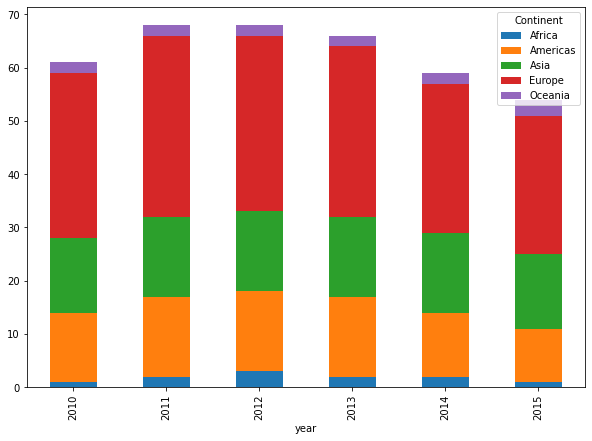

In [321]:
fig5,ax5 = plt.subplots()
high_income_number.plot(ax= ax5,kind='bar',stacked = True,figsize=(10,7))

**Bonus Section**  
Can you use the above text method to label the actual number on the bar chart we drew before?

In [322]:

for rect in ax5.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = '{:.0f}'.format(height) # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax5.text(label_x, label_y, label_text, ha='center', va='center')

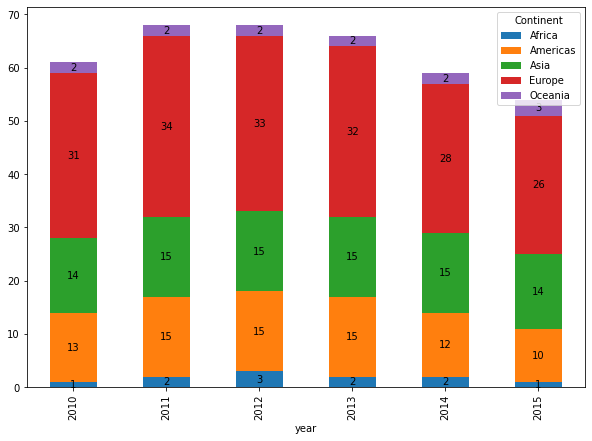

In [323]:
fig5